In [9]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, initial_state_mean, initial_state_covariance, process_covariance, measurement_covariance):
        self.state_mean = initial_state_mean
        self.state_covariance = initial_state_covariance
        self.process_covariance = process_covariance
        self.measurement_covariance = measurement_covariance

    def predict(self):
        # Prediction step
        self.state_mean = 0  # 一维状态的线性系统简化为 0
        self.state_covariance += self.process_covariance

    def update(self, measurement):
        # Update step
        kalman_gain = self.state_covariance / (self.state_covariance + self.measurement_covariance)
        self.state_mean += kalman_gain * (measurement - self.state_mean)
        self.state_covariance *= (1 - kalman_gain)

In [10]:
# 定义系统参数
initial_state_mean = 0  # 初始状态的均值
initial_state_covariance = 1  # 初始状态的协方差
process_variance = 0.1  # 系统过程噪声的方差
measurement_variance = 0.5  # 测量噪声的方差

# 创建 Kalman 滤波器对象
kf = KalmanFilter(initial_state_mean, initial_state_covariance, process_variance, measurement_variance)


In [11]:
# 生成模拟数据 - 正弦波
np.random.seed(42)
t = np.linspace(0, 10, 100)
true_states_sin = np.sin(t)
measurements_sin = true_states_sin + np.random.normal(loc=0, scale=0.5, size=100)  # 观测值

# 运行 Kalman 滤波器
filtered_states_sin = []
for z in measurements_sin:
    kf.predict()
    kf.update(z)
    filtered_states_sin.append(kf.state_mean)

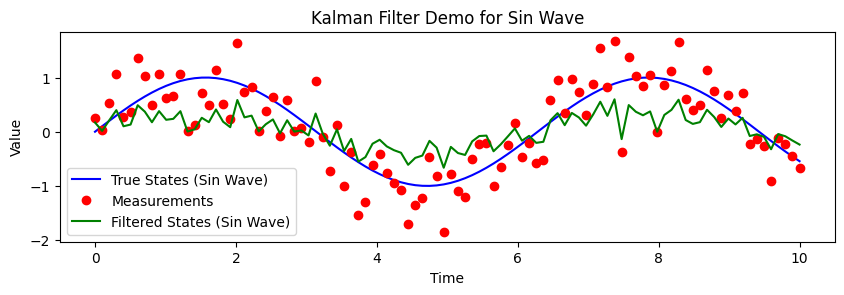

In [12]:
# 绘图
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, true_states_sin, label='True States (Sin Wave)', color='blue')
plt.plot(t, measurements_sin, label='Measurements', color='red', marker='o', linestyle='')
plt.plot(t, filtered_states_sin, label='Filtered States (Sin Wave)', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter Demo for Sin Wave')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

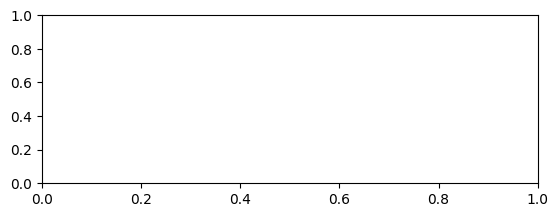

In [14]:
# 生成模拟数据 - 预测未来值
predicted_states = []
for i in range(100, 150):
    kf.predict()
    predicted_states.append(kf.state_mean)

plt.subplot(2, 1, 2)
plt.plot(range(100, 150), true_states_sin[100:150], label='True Future States', color='blue')
plt.plot(range(100, 150), predicted_states[:50], label='Predicted Future States', color='orange')  # 只取与真实值长度相同的部分
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter Prediction for Future Values')
plt.legend()

plt.tight_layout()
plt.show()

